In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [125]:
data = pd.read_csv("Dataset/Social_Network_Ads.csv")

In [126]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [127]:
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
model = LogisticRegression()
X_train = np.linspace(-6, 6, 400).reshape(-1, 1)  # Generate some sample data
y_train = np.random.randint(0, 2, 400)  # Generate random labels
model.fit(X_train, y_train)

LogisticRegression()

In [131]:
coef = model.coef_[0][0]
intercept = model.intercept_[0]

In [132]:
model.fit(X_train, y_train)

LogisticRegression()

In [134]:
y_pred = model.predict(X_test)

ValueError: X has 2 features, but LogisticRegression is expecting 1 features as input.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.8625


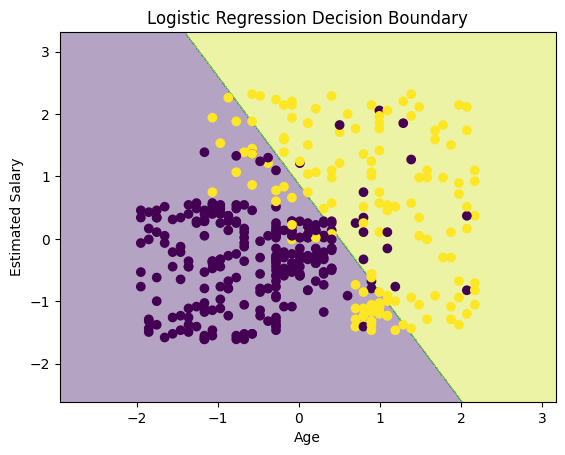

In [ ]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

x_min, x_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
y_min, y_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined, marker='o')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [ ]:
def logistic_function(x):
    return 1 / (1 + np.exp(-(coef * x + intercept)))

In [ ]:
x = np.linspace(-6, 6, 400) 

In [ ]:
y = logistic_function(x)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Logistic Curve', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Curve from Trained Model')
plt.axhline(y=0.5, color='red', linestyle='--', label='y = 0.5 Threshold')
plt.axvline(x=0, color='green', linestyle='--', label='x = 0')
plt.legend()
plt.grid()
plt.show()